In [1]:
from classy import Class
from matplotlib import pyplot as plt
import numpy as np

# Import MGCAMB (which is not installed in python library)
import os
import sys
camb_path = '/home/ardok/PD1-Oxford/codes/MGCAMB/src/pycamb/'
sys.path.insert(0,camb_path)
import camb

print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 0.1.9 installed at /home/ardok/PD1-Oxford/codes/MGCAMB/src/pycamb/camb


In [4]:
pars = camb.set_params(H0=67, GRtrans=0.001, model=1)

CAMBUnknownArgumentError: Unrecognized parameters: {'GRtrans', 'model'}

In [8]:
pars.

AttributeError: 'CAMBparams' object has no attribute 'pars'

In [2]:
params = {'H0': 67.5,
          'omega_b': 0.022,
          'omega_cdm': 0.122,
          'tau_reio': 0.06,
          'A_s': 2e-9,
          'n_s': 0.965, 
          'lensing': 'yes',
          'output': 'mPk, tCl, lCl, pCl, mTk',
          'l_max_scalars': 2500,
          'Omega_Lambda': 0, 
          'Omega_fld': 0, 
          'Omega_smg': -1, 
          'gravity_model': 
          'mgclass_fs', 
          'expansion_model': 'lcdm',
          'parameters_smg': '0, 0',
          'expansion_smg': '0.7'}

In [3]:
##### CLASS #####
cosmo = Class()
cosmo.set(params)
cosmo.compute()
cl_class = cosmo.lensed_cl()
ell_class = cl_class['ell']
factor_class = (ell_class * (ell_class + 1) / ( 2 * np.pi))  * (cosmo.T_cmb() * 1e6) ** 2.



#### CAMB ####

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=params['H0'], ombh2=params['omega_b'],
                   omch2=params['omega_cdm'], mnu=0, omk=0, tau=params['tau_reio'])
pars.
pars.InitPower.set_params(As=params['A_s'], ns=params['n_s'], r=0)
pars.set_for_lmax(params['l_max_scalars'], lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
cl_camb = powers['total'][:params['l_max_scalars']+1]
ell_camb = np.arange(cl_camb.shape[0])

/tmp/ipykernel_32376/2860490284.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax[1].semilogx(ell_camb, factor_class * cl_class['tt'] / cl_camb[:, 0] -1)


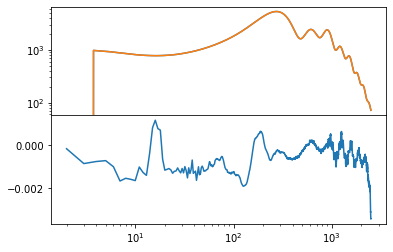

In [4]:
f, ax = plt.subplots(2, 1, gridspec_kw={'hspace': 0})
ax[0].loglog(ell_camb, cl_camb[:, 0], label='CAMB')
ax[0].loglog(ell_class, factor_class * cl_class['tt'], label='MGCLASS')

ax[1].semilogx(ell_camb, factor_class * cl_class['tt'] / cl_camb[:, 0] -1)

plt.show()
plt.close()